In [2]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 1.3 MB/s eta 0:00:000:00:010:00:0102
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 1.5 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]━━━━ 3/4 [pandas]
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:01:030m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
dataset=pd.read_csv('dataset.csv')

In [16]:
dataset

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0,0
2,2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0,0
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,1,0,0,0,0,0,0,0,1,0
756,764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,0,1,0,0,0,1,0,0,1,0
757,765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,0,0,0,1,0,1,0,0,1,0
758,766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,1,0,0,0,0,0,0,0,1,0


<Axes: xlabel='Insulin'>

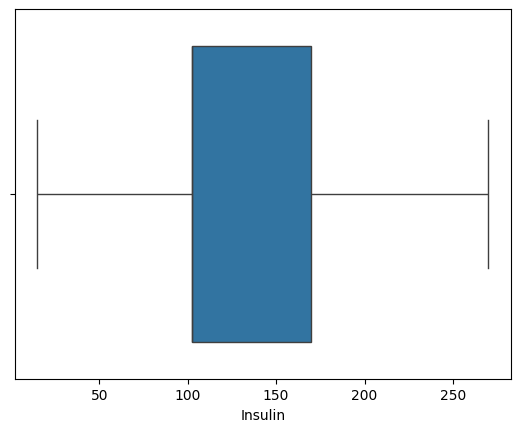

In [18]:
sns.boxplot(x = dataset["Insulin"])

In [19]:
dataset.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
NewBMI_Obesity 1            0
NewBMI_Obesity 2            0
NewBMI_Obesity 3            0
NewBMI_Overweight           0
NewBMI_Underweight          0
NewInsulinScore_Normal      0
NewGlucose_Low              0
NewGlucose_Normal           0
NewGlucose_Overweight       0
NewGlucose_Secret           0
dtype: int64

In [21]:
dataset.corr()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
Unnamed: 0,1.000000,-0.042042,0.001476,0.040711,0.014367,0.014137,0.010050,-0.044791,0.001059,-0.041828,-0.038170,0.050210,-0.015961,0.024226,0.006933,0.005198,0.038233,0.010998,-0.010861,-0.008184
Pregnancies,-0.042042,1.000000,0.135068,0.220009,0.114823,0.109669,0.047503,-0.025079,0.544814,0.233348,0.058516,0.067708,-0.058788,-0.014315,-0.067365,-0.120795,0.017878,-0.112935,-0.031464,0.125870
Glucose,0.001476,0.135068,1.000000,0.227367,0.203109,0.553145,0.233335,0.125093,0.266118,0.494213,0.044565,0.044450,0.168526,-0.082501,-0.063108,-0.479461,-0.241369,-0.604307,-0.232685,0.821032
BloodPressure,0.040711,0.220009,0.227367,1.000000,0.212695,0.113850,0.305759,0.002757,0.340829,0.182309,-0.013890,0.130791,0.193575,-0.124277,-0.017897,-0.133654,0.007323,-0.186713,-0.066875,0.228449
SkinThickness,0.014367,0.114823,0.203109,0.212695,1.000000,0.260835,0.570014,0.078077,0.118619,0.281523,0.029235,0.283765,0.334375,-0.277939,-0.059862,-0.246583,-0.033932,-0.208695,0.019988,0.170932
Insulin,0.014137,0.109669,0.553145,0.113850,0.260835,1.000000,0.316457,0.165724,0.165134,0.509097,0.072560,0.101918,0.184881,-0.151912,-0.045399,-0.820289,-0.109575,-0.411915,-0.080953,0.468380
BMI,0.010050,0.047503,0.233335,0.305759,0.570014,0.316457,1.000000,0.128934,0.045558,0.299717,0.010634,0.370531,0.668585,-0.400961,-0.154718,-0.304873,-0.044857,-0.165133,-0.057737,0.213299
DiabetesPedigreeFunction,-0.044791,-0.025079,0.125093,0.002757,0.078077,0.165724,0.128934,1.000000,0.040008,0.166545,-0.007485,-0.008047,0.158872,-0.048926,-0.012588,-0.156694,-0.042541,-0.048928,-0.059322,0.112660
Age,0.001059,0.544814,0.266118,0.340829,0.118619,0.165134,0.045558,0.040008,1.000000,0.246939,0.026495,0.078612,-0.043455,-0.025013,-0.057646,-0.168660,0.067097,-0.220011,-0.072416,0.248377
Outcome,-0.041828,0.233348,0.494213,0.182309,0.281523,0.509097,0.299717,0.166545,0.246939,1.000000,0.125970,0.077083,0.155184,-0.139066,-0.052914,-0.650555,-0.088157,-0.317394,-0.119731,0.419215


/var/folders/0d/cy9fvvd11pg06x10z033kr4r0000gn/T/ipykernel_7172/1970719646.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.Age, bins = 20, ax=ax[0,0])
/var/folders/0d/cy9fvvd11pg06x10z033kr4r0000gn/T/ipykernel_7172/1970719646.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datase

<Axes: xlabel='BMI', ylabel='Density'>

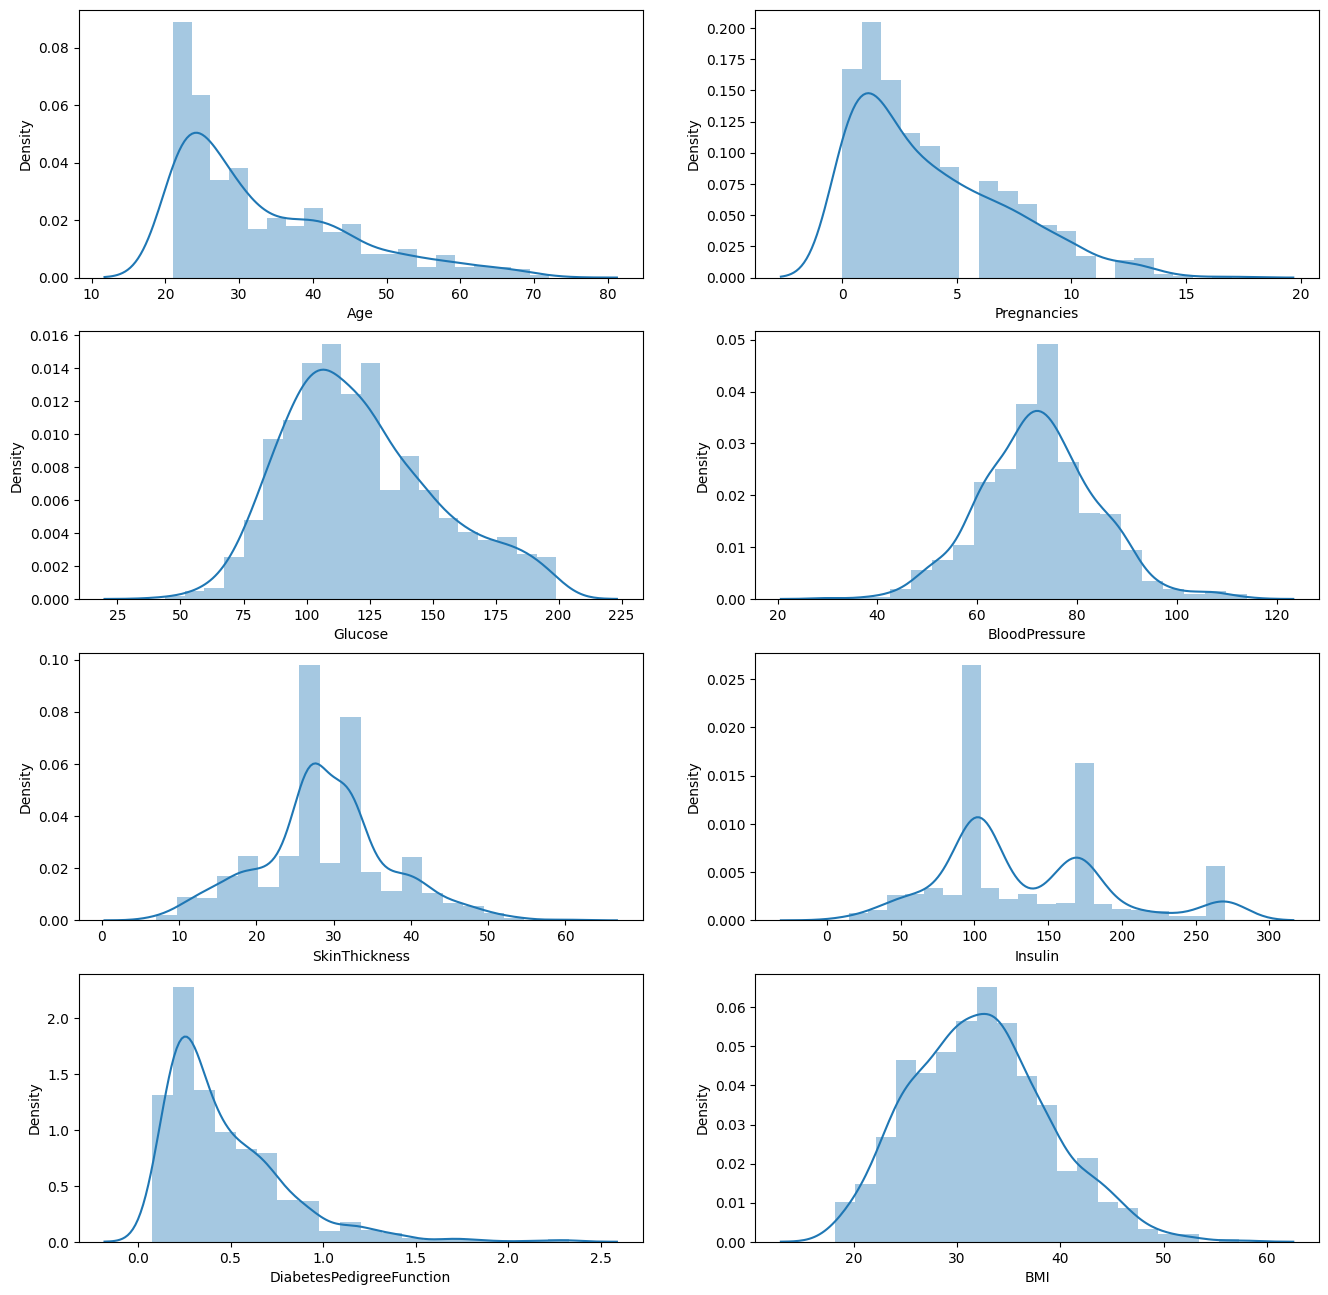

In [27]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(dataset.Age, bins = 20, ax=ax[0,0])
sns.distplot(dataset.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(dataset.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(dataset.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(dataset.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(dataset.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(dataset.BMI, bins = 20, ax=ax[3,1])

In [29]:
y = dataset["Outcome"] #making the y axis of our dataset
X = dataset.drop(["Outcome"], axis = 1) #creating the x axis of our datset, we are dopping the Outcome column

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42) 

In [32]:

tree = RandomForestClassifier() 
clf = tree.fit(X_train,y_train)
y_pred = clf.predict(X_test) 
accuracy_score(y_pred,y_test)

0.900398406374502

In [33]:
tree = GradientBoostingClassifier() 
clf = tree.fit(X_train,y_train) 
y_pred = clf.predict(X_test) 
accuracy_score(y_pred,y_test)

0.8804780876494024

In [34]:
tree = SVC(gamma='auto')
clf = tree.fit(X_train,y_train) 
y_pred = clf.predict(X_test) 
accuracy_score(y_pred,y_test)

0.6693227091633466